# **3장. 기초 인공 신경망 모델**

## **3-3절. 소프트맥스 신경망**

라이브러리 불러오기 (그림용 한글 폰트 포함)

In [ ]:
!pip install koreanize_matplotlib
import koreanize_matplotlib
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
from sklearn.metrics import r2_score; import seaborn as sns
import tensorflow as tf; from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score; import random
import warnings; warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 107.0 MB/s eta 0:00:00


📌[실습 03-29] 데이터 불러오기

In [ ]:
df=pd.read_csv("구종분류_800.csv", encoding="cp949")
df

,velocity,spin_rate,horizontal_break,vertical_break,release_angle,구종
0,95.692896,2347.535622,1.844323,7.296631,56.056166,직구
1,79.302915,2511.400809,11.327105,2.881931,62.432425,슬라이더
2,75.064949,2467.935772,10.109868,17.561928,63.430116,커브
3,96.476933,2120.747926,2.384065,9.328431,54.851609,직구
4,79.207489,2648.806352,13.346443,3.489187,58.998542,슬라이더
...,...,...,...,...,...,...
795,96.645090,2414.394409,3.502357,7.975791,54.895945,직구
796,82.911808,1631.265565,6.486472,7.977816,63.671322,체인지업
797,85.509866,1712.167692,7.176353,9.462761,58.958574,커브
798,83.711111,1706.207442,6.745373,10.905233,57.609819,커브


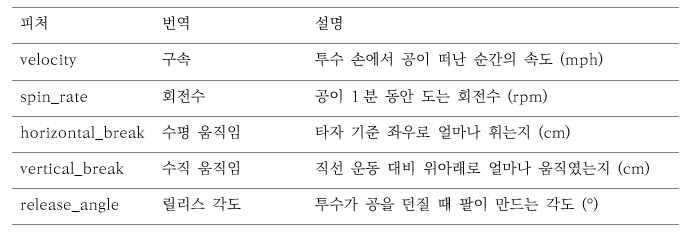

📌[실습 03-30] 산점도로 시각화하기

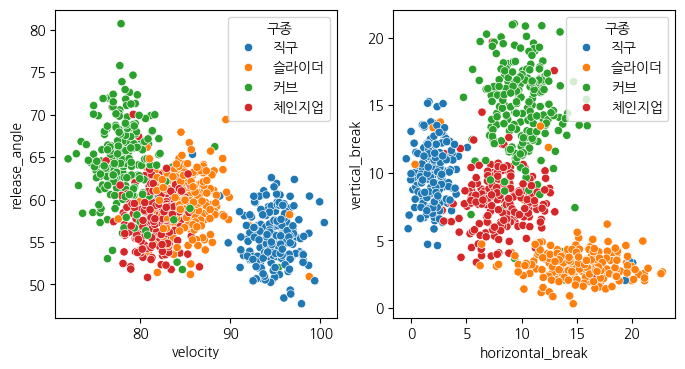

In [ ]:
# 산점도로 시각화하기
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
sns.scatterplot(x=df["velocity"], y=df["release_angle"], hue=df["구종"])
plt.subplot(1,2,2)
sns.scatterplot(x=df["horizontal_break"], y=df["vertical_break"], hue=df["구종"])
plt.show()

📌[실습 03-31] 피처와 타깃 지정하기

In [ ]:
X=df.drop("구종", axis=1)
y=df["구종"]

# 타겟을 원핫 인코딩
y_oh=pd.get_dummies(y).astype(int)
y_oh.head(5)

,슬라이더,직구,체인지업,커브
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,1,0,0,0


📌[실습 03-32] 데이터 분할하기

In [ ]:
SEED=42; np.random.seed(SEED); random.seed(SEED); tf.random.set_seed(SEED)
x_train, x_test, y_train, y_test=train_test_split(X, y_oh, test_size=0.3, random_state=SEED,
#stratify=y_oh,    # 훈련/검증 데이터에서 타깃 클래스 비율을 동일하게 설정하는 옵션
)

📌[실습 03-33] 인공 신경망 기반 분류 모델을 설정하고 컴파일하기

In [ ]:
MLB=Sequential()
MLB.add(Dense(16, input_dim=x_train.shape[1], activation="relu"))
MLB.add(Dense(8, activation="relu"))
MLB.add(Dense(4, activation="softmax"))
MLB.summary()
# 컴파일
MLB.compile(optimizer="adam", loss="categorical_crossentropy",
             metrics=["accuracy"])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268 (1.05 KB)

 Trainable params: 268 (1.05 KB)

 Non-trainable params: 0 (0.00 B)

📌[실습 03-34] 인공 신경망 기반 분류 모델 설정하기

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(
    monitor='val_loss',             # 검증 손실을 모니터링
    patience=5,                     # 5번 연속 개선되지 않으면 멈춤
    restore_best_weights=True)      # 가장 좋은 모델로 파라미터 복원
hist=MLB.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test), callbacks=[early_stop])

📌[실습 03-35] 손실 변화 시각화하기

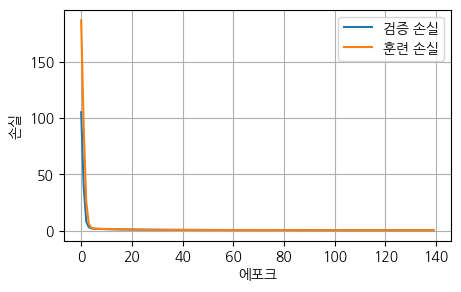

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(hist.history['val_loss'], label='검증 손실')
plt.plot(hist.history['loss'], label='훈련 손실')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.legend(); plt.grid()
plt.show()

📌[실습 03-36] 검증 타깃의 클래스별 확률 예측하기

In [ ]:
y_prob=MLB.predict(x_test)
print(y_prob[:5])   # 첫 10행 출력

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[2.87875868e-02 2.22548167e-03 1.48122013e-01 8.20864916e-01]
 [9.58282530e-01 1.01992523e-03 5.43948030e-03 3.52580696e-02]
 [7.25073600e-03 1.04837927e-04 8.54723621e-03 9.84097123e-01]
 [2.54715811e-02 9.18387771e-01 4.25622724e-02 1.35783665e-02]
 [9.85774994e-01 4.92314030e-05 7.67762191e-04 1.34080984e-02]]


📌[실습 03-37] 예측된 클래스 선택하기

In [ ]:
y_pred=np.argmax(y_prob, axis=1)
print(y_pred[:5])

class_labels=["슬라이더", "직구", "체인지업", "커브"]
y_pred_labels=[ class_labels[i] for i in y_pred]
y_pred_labels[:5]

[3 0 3 1 0]


['커브', '슬라이더', '커브', '직구', '슬라이더']

📌[실습 03-38] 혼동 행렬로 예측 정확도 시각화하기

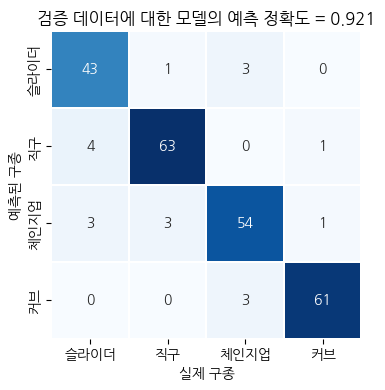

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_idx=np.argmax(y_test,axis=1) # 실제 y 클래스도 인덱스로 변환하여 비교

cm=confusion_matrix(y_idx, y_pred) # 혼동행렬 생성
acc=accuracy_score(y_idx, y_pred) # 분류정확도 계산

# 혼동 행렬 시각화 (이전과 동일)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True,linewidths=0.1, cmap='Blues',cbar=None,
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('실제 구종'); plt.ylabel('예측된 구종')
plt.title(f'검증 데이터에 대한 모델의 예측 정확도 = {acc:.3f}'); plt.show()
plt.show()

📌[실습 03-39] 새로운 피처를 입력하여 구종 예측하기

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


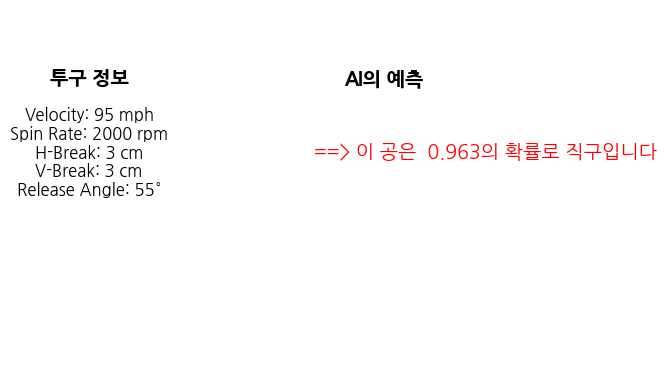

In [ ]:
new_pitch={                # 딕셔너리 자료
    "velocity": 95,
    "spin_rate": 2000,
    "horizontal_break": 3,
    "vertical_break": 3,
    "release_angle": 55 }
new_df=pd.DataFrame([new_pitch])  # 데이터프레임 변환
prob=MLB.predict(new_df)          # 예측 확률 계산
pred=np.argmax(prob, axis=1)      # 예측된 클래스 인덱스

# 결과 시각화
plt.text(0.1, 0.8, "투구 정보", ha="center", fontsize=14, weight="bold")
plt.text(0.1, 0.5,
        f"Velocity: {new_pitch['velocity']} mph\n"
        f"Spin Rate: {new_pitch['spin_rate']} rpm\n"
        f"H-Break: {new_pitch['horizontal_break']} cm\n"
        f"V-Break: {new_pitch['vertical_break']} cm\n"
        f"Release Angle: {new_pitch['release_angle']}°",
        ha="center", fontsize=12)
plt.text(0.7, 0.8, "AI의 예측 ", ha="center", fontsize=14, weight="bold")
plt.text(0.9, 0.6, f"==> 이 공은  {np.max(prob, axis=1).item():.3f}의 확률로 {class_labels[pred.item()]}입니다",
        ha="center", fontsize=14, color="red")

plt.xlim(0, 1); plt.ylim(0, 1); plt.axis("off")
plt.show()


피처 변경하여 예측하기

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


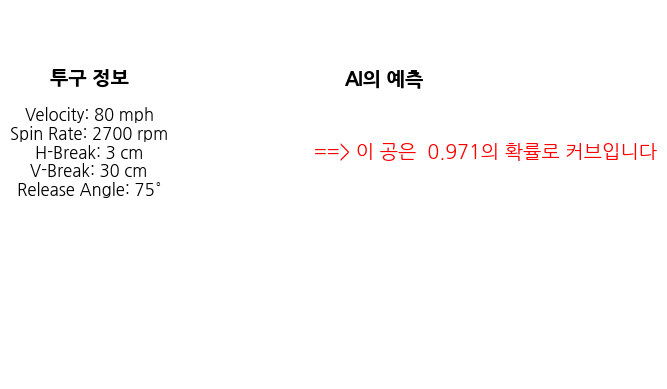

In [ ]:
new_pitch={                # 딕셔너리 자료
    "velocity": 80,
    "spin_rate": 2700,
    "horizontal_break": 3,
    "vertical_break": 30,
    "release_angle": 75 }
new_df=pd.DataFrame([new_pitch]) # 데이터프레임 변환
prob=MLB.predict(new_df)          # 예측 확률 계산
pred=np.argmax(prob, axis=1)     # 예측된 클래스 인덱스

# 결과 시각화
plt.text(0.1, 0.8, "투구 정보", ha="center", fontsize=14, weight="bold")
plt.text(0.1, 0.5,
        f"Velocity: {new_pitch['velocity']} mph\n"
        f"Spin Rate: {new_pitch['spin_rate']} rpm\n"
        f"H-Break: {new_pitch['horizontal_break']} cm\n"
        f"V-Break: {new_pitch['vertical_break']} cm\n"
        f"Release Angle: {new_pitch['release_angle']}°",
        ha="center", fontsize=12)
plt.text(0.7, 0.8, "AI의 예측 ", ha="center", fontsize=14, weight="bold")
plt.text(0.9, 0.6, f"==> 이 공은  {np.max(prob, axis=1).item():.3f}의 확률로 {class_labels[pred.item()]}입니다",
        ha="center", fontsize=14, color="red")

plt.xlim(0, 1); plt.ylim(0, 1); plt.axis("off")
plt.show()
